In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def global_threshold(image, thres_value, val_high, val_low):
    img = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > thres_value:
                img[i,j] = val_high
            else:
                img[i,j] = val_low
    return img

def thres_finder(img, thres=20,delta_T=1.0):
    
    # Step-2: Divide the images in two parts
    x_low, y_low = np.where(img<=thres)
    x_high, y_high = np.where(img>thres)
    
    # Step-3: Find the mean of two parts
    mean_low = np.mean(img[x_low,y_low])
    mean_high = np.mean(img[x_high,y_high])
    
    # Step-4: Calculate the new threshold
    new_thres = (mean_low + mean_high)/2
    
    # Step-5: Stopping criteria, otherwise iterate
    if abs(new_thres-thres)< delta_T:
        return new_thres
    else:
        return thres_finder(img, thres=new_thres,delta_T=1.0)


threshold finder get 95.50481737989432
actual threshold = 95.0


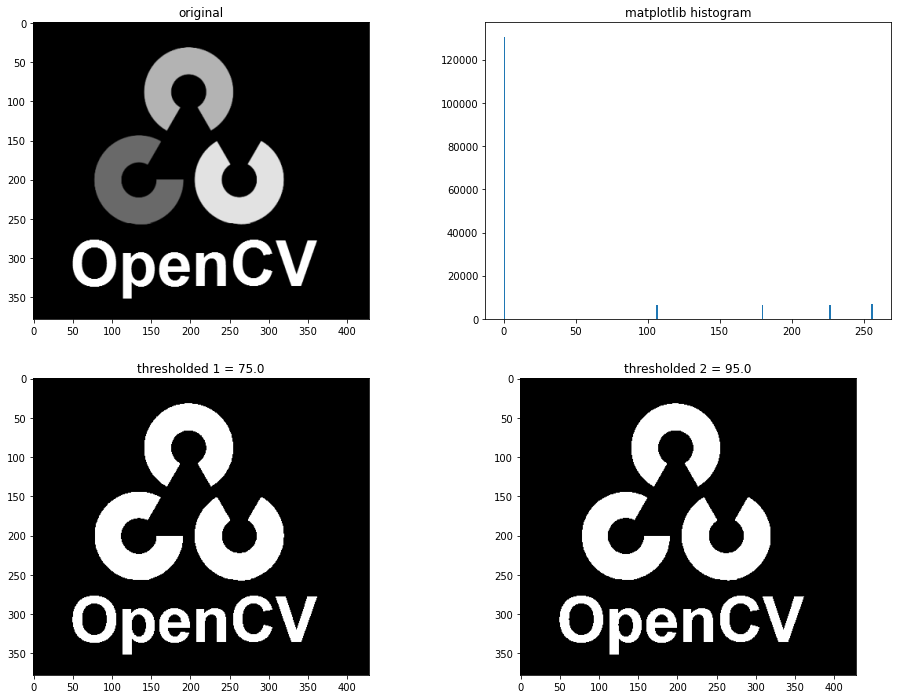

In [8]:
# Load an image in the greyscale
img = cv2.imread('opencv_logo.png', cv2.IMREAD_GRAYSCALE)
img = 255 - img

# threshold the image
ret1, thresh1 = cv2.threshold(img,75,255,cv2.THRESH_BINARY)

# apply threshold finder
vv1 = thres_finder(img, thres=30,delta_T=1.0)
print("threshold finder get {}".format(vv1))

# threshold the image
ret2, thresh2 = cv2.threshold(img,vv1,255,cv2.THRESH_BINARY)
print("actual threshold = {}".format(ret2))

plt.subplot(2,2,1)
plt.title("original")
plt.imshow(img, cmap ='gray')

plt.subplot(2,2,2)
plt.title("matplotlib histogram")
plt.hist(img.flatten(), 256, [0,256])

plt.subplot(2,2,3)
plt.title("thresholded 1 = {}".format(ret1))
plt.imshow(thresh1, cmap ='gray')

plt.subplot(2,2,4)
plt.title("thresholded 2 = {}".format(ret2))
plt.imshow(thresh2, cmap ='gray')

plt.gcf().set_size_inches(16, 12)
plt.show()